In [ ]:
from pandas import read_csv

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Wide.csv to Wide (1).csv


In [ ]:
filename = "Wide.csv"
names = ['WARNER BROS','WALT DISNEY','20TH','Class']
dataset = read_csv(filename, names=names)

In [ ]:
print(dataset.shape)
print(dataset.head(28))
print(dataset.describe())
print(dataset.groupby('Class').size())

(27, 4)
      WARNER BROS  WALT DISNEY  20TH   Class
2021           17            7     0     Low
2020            5            3     1     Low
2019           18           10    11     Low
2018           19           10    11  Medium
2017           18            8    14  Medium
2016           17           12    16  Medium
2015           22           11    18  Medium
2014           17           12    17  Medium
2013           17            8    15  Medium
2012           16           11    15  Medium
2011           20           13    15  Medium
2010           20           12    18  Medium
2009           25           14    20    High
2008           19           11    22  Medium
2007           30           13    17    High
2006           26           17    25    High
2005           20           20    19    High
2004           27           25    18    High
2003           28           19    13    High
2002           32           23    15    High
2001           30           16    16    High
20

In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

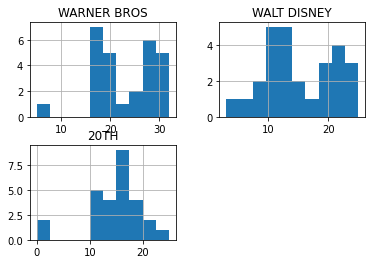

In [ ]:
dataset.hist()
pyplot.title('HISTOGRAM PLOT')
pyplot.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
array = dataset.values
X = array[:,0:3]
Y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X , Y, test_size = 0.20, random_state=1, shuffle=True)

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

LR: 0.816667 (0.229129)
LDA: 0.916667 (0.170783)
KNN: 0.816667 (0.320156)
CART: 0.916667 (0.170783)
NB: 0.916667 (0.170783)
SVM: 0.716667 (0.236291)


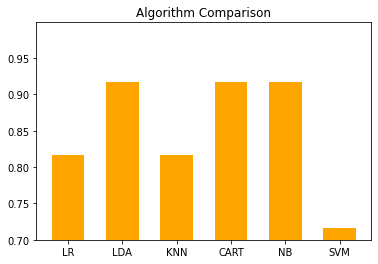

In [ ]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

pyplot.ylim(.700, .999)
pyplot.bar(names, res, color ='Orange', width = 0.6)

pyplot.title('Algorithm Comparison')
pyplot.show()